In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib

from datetime import datetime

from APIs import goldenAndDeathCross as gdc
from APIs import stochasticOscillators as so
from APIs import general_APIs as general
from APIs import percentagePriceOscillator as ppo
from APIs import movingAverageConvergenceDivergence as macd
from APIs import relativeStrengthIndex as rsi

# Ticker type
# Choose either "S&P500", "Tech", or "NASDAQ"
# For any other company/ETF/MF/etc., write tickerType = "<company_ticker_name>"
tickerType = "Tech"
# tickerType = "Tech"
# tickerType = "NASDAQ"

if tickerType.lower() == "S&P500".lower(): # S&P 500 ETF
    companyName ='IVV'
elif tickerType.lower() == "Tech".lower(): # Tech ETF
    companyName = 'FTEC'
elif tickerType.lower() == "NASDAQ".lower(): # NASDAQ ETF
    companyName = 'ONEQ'
else:
    companyName = tickerType.upper()

start = '2022-04-01'

print('Tracking {} from {} to current date'.format(companyName, start))

Tracking FTEC from 2022-04-01 to current date


In [2]:
general.loadCompanyData(companyName, start=start).tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2023-04-26,110.690002,111.489998,110.059998,110.339996,164600,0.0,0,2023-04-26
2023-04-27,110.879997,112.529999,110.660004,112.459999,136700,0.0,0,2023-04-27
2023-04-28,112.389999,113.620003,112.220001,113.620003,208600,0.0,0,2023-04-28
2023-05-01,113.610001,114.209999,113.400002,113.720001,157400,0.0,0,2023-05-01
2023-05-02,113.680000,113.739998,111.930000,112.440002,906000,0.0,0,2023-05-02


# Golden cross and/or death cross detection
<br>
### Interpretation
SMA = Simple Moving Average <br>
Golden cross is when short term SMA crosses the long term SMA going upwards (buy signal) <br>
Death cross is when short term SMA crosses the long term SMA going downwards (sell signal)

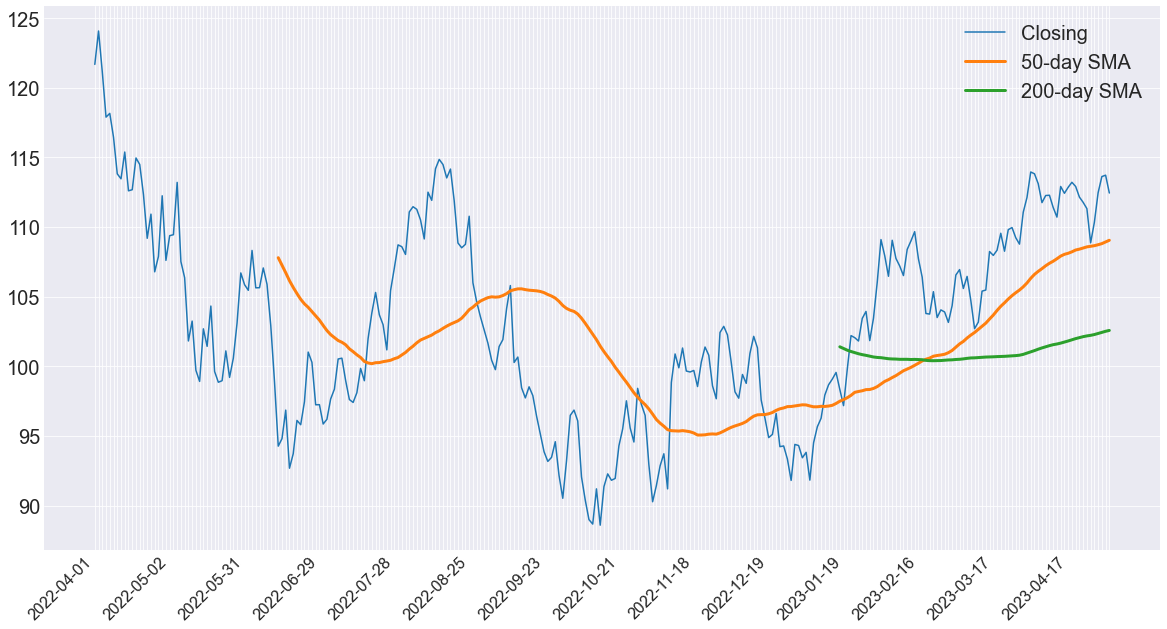

In [3]:
gdc.analyzeGoldenAndDeathCross(companyName, # Ticker symbol
                               nDays_short=50, # duration of short term SMA
                               nDays_long=200, # duration of long term SMA
                               start=start, # Start date to start computing
                               every_nth = 20) # interval (# days) between two successive tick labels on x-axis



# Stochastic Oscillators
<br>
The Stochastic Oscillator makes it easy to identify overbought and oversold levels. The oscillator ranges from zero to one hundred. No matter how fast a security advances or declines, the Stochastic Oscillator will always fluctuate within this range. Traditional settings use 80 as the overbought threshold and 20 as the oversold threshold. These levels can be adjusted to suit analytical needs and security characteristics. Readings above 80 for the 20-day Stochastic Oscillator would indicate that the underlying security was trading near the top of its 20-day high-low range. Readings below 20 occur when a security is trading at the low end of its high-low range. <br> <br>


Closing levels that are consistently near the top of the range indicate sustained buying pressure. Closing levels consistently near the bottom of the range indicate sustained selling pressure. Look for occasional oversold readings in an uptrend and ignore frequent overbought readings. Similarly, look for occasional overbought readings in a strong downtrend and ignore frequent oversold readings. <br> <br>


Orange boxes are overbought & strong regions (stocks are trading within 20% of n-day highest high). Moves above 80 warn of overbought conditions that could foreshadow a decline. A subsequent move below 80 is needed to signal some sort of reversal or failure at resistance (red dotted lines).<br> <br>


Purple boxes are oversold & weak regions (stocks are trading within 20% of n-day lowest low).Dips below 20 warn of oversold conditions that could foreshadow a bounce. A move above 20 is needed to show an actual upturn and successful support test (green dotted lines).

## Fast stochastic oscillators
<br>
### Stochastic Oscillator measures the level of the close relative to the high-low range over a given period of time.
Lowest Low = lowest low for the look-back period <br>
Highest High = highest high for the look-back period <br>
Fast %K = (Current Close - Lowest Low)/(Highest High - Lowest Low) * 100 <br>
Fast %D = n-day SMA of %K

0
0


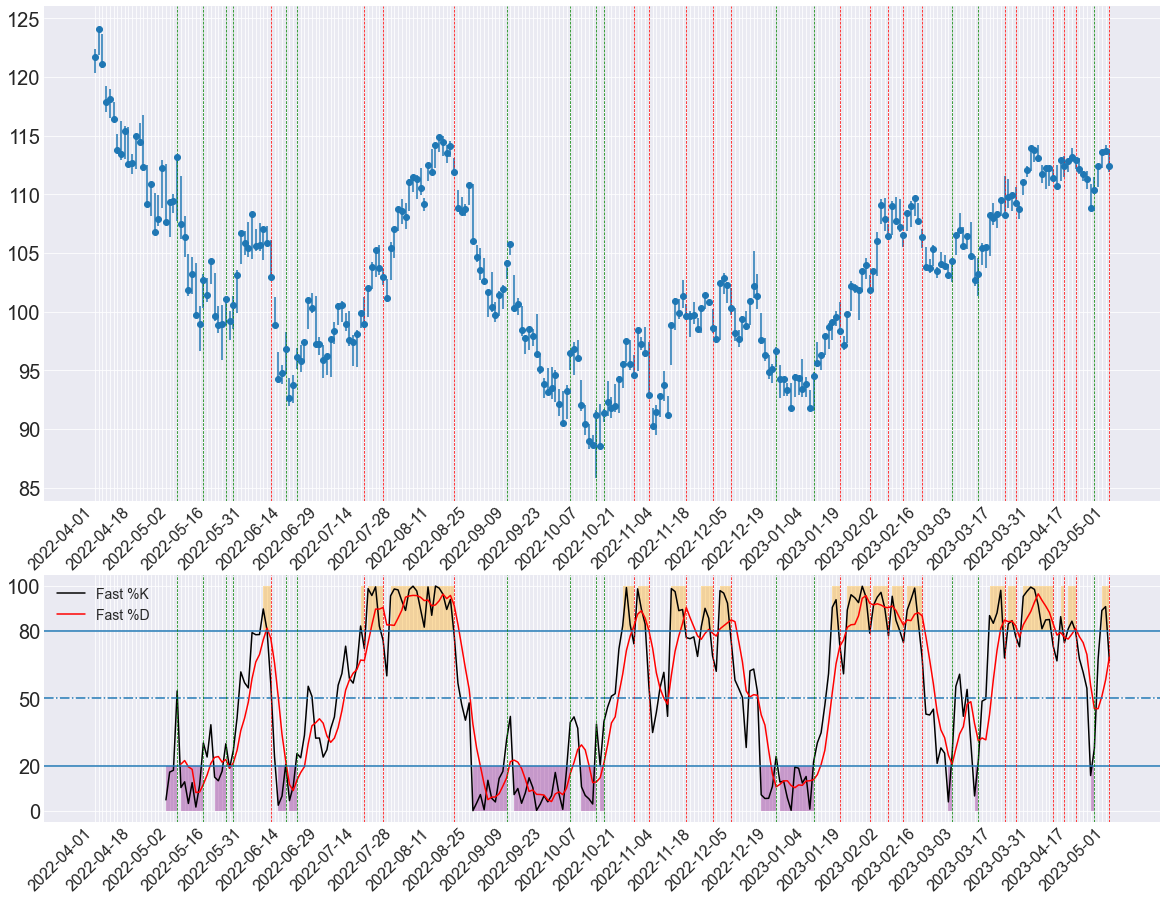

In [4]:
so.computeAndPlotFastStochasticOscillator(companyName, # Ticker symbol
                                          n1=20, # look-back period
                                          n2=5, # duration for SMA when calculating %D from %K
                                          start=start, # Start date to start computing
                                          every_nth = 10) # interval (# days) between two successive tick labels on x-axis

## Slow stochastic oscillators
<br>
Slow %K = n-day SMA of fast %K = Fast %D <br>
Slow %D = n-day SMA of slow %K

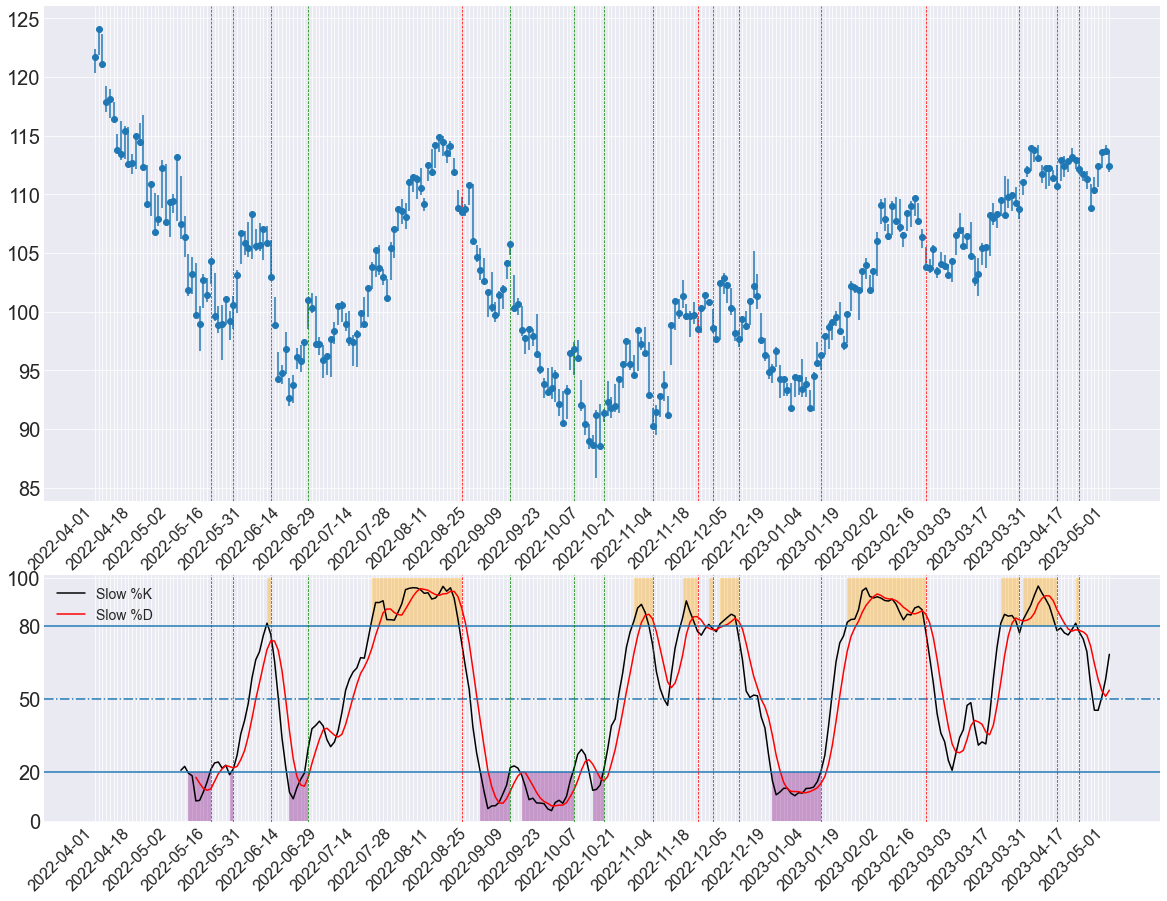

In [5]:
so.computeAndPlotSlowStochasticOscillator(companyName, # Ticker symbol
                                          n1=20, # look-back period
                                          n2=5, # duration for SMA when calculating both slow %K and slow %D 
                                          start=start, # Start date to start computing
                                          every_nth = 10) # interval (# days) between two successive tick labels on x-axis

## Full stochastic oscillators
<br>
Full Stochastic Oscillator is a fully customizable version of the Slow Stochastic Oscillator <br>
Users can set the look-back period, the number of periods for slow %K, and the number of periods for the %D moving average

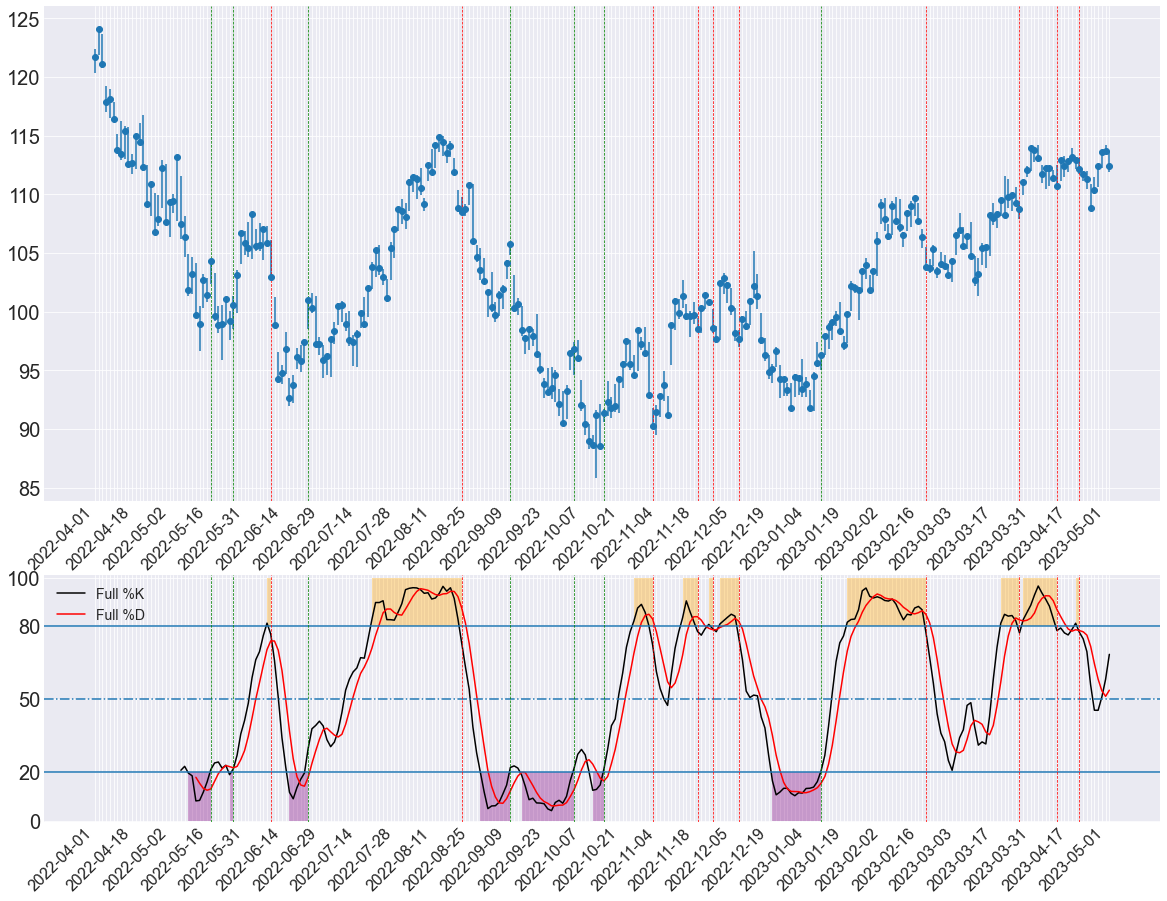

In [6]:
so.computeAndPlotFullStochasticOscillator(companyName, # Ticker symbol
                                          n1=20, # look-back period
                                          n2=5, # duration for SMA when calculating both full %K from fast %K
                                          n3=5, # duration for SMA when calculating both full %D from full %K
                                          start=start, # Start date to start computing
                                          every_nth = 10) # interval (# days) between two successive tick labels on x-axis

Divergences form when a new high or low in price is not confirmed by the Stochastic Oscillator. A bullish divergence forms when price records a lower low, but the Stochastic Oscillator forms a higher low. This shows less downside momentum that could foreshadow a bullish reversal. A bearish divergence forms when price records a higher high, but the Stochastic Oscillator forms a lower high. This shows less upside momentum that could foreshadow a bearish reversal. Once a divergence takes hold, chartists should look for a confirmation to signal an actual reversal. A bearish divergence can be confirmed with a support break on the price chart or a Stochastic Oscillator break below 50, which is the centerline. A bullish divergence can be confirmed with a resistance break on the price chart or a Stochastic Oscillator break above 50. <br> <br>
A Stochastic Oscillator cross above 50 signals that prices are trading in the upper half of their high-low range for the given look-back period. This suggests that the cup is half full. Conversely, a cross below 50 means that prices are trading in the bottom half of the given look-back period. This suggests that the cup is half empty. <br> <br>
There are three steps to confirming this higher low. The first is a signal line cross and/or move back above 20. A signal line cross occurs when %K (black) crosses %D (red). This provides the earliest entry possible. The second is a move above 50, which puts prices in the upper half of the Stochastic range. The third is a resistance breakout on the price chart. 

# Percentage Price Oscillator
<br>
The percentage price oscillator (PPO) is a technical momentum indicator that shows the relationship between two moving averages in percentage terms. The moving averages are a 26-period and 12-period exponential moving average (EMA). <br><br>
The PPO is used to compare asset performance and volatility, spot divergence that could lead to price reversals, generate trade signals, and help confirm trend direction.<br><br>
$PPO=\frac{\text{26-period EMA} - \text{12-period EMA}}{\text{26-period EMA}}\times100$<br><br>
$\text{Signal Line}=\text{9-period EMA of PPO}$<br><br>
$\text{PPO Histogram}=\text{PPO}−\text{Signal Line}$<br><br>
where $\text{EMA}=\text{Exponential moving average}$<br><br>
A PPO result of 10 means the short-term average is 10% above the long-term average. The indicator generates a buy signal when the PPO line crosses above the signal line from below, and generates a sell signal when the PPO line crosses below the signal from above. Signal line crossovers are used in conjunction with where the PPO is relative to zero/centerline. <br><br>
When the PPO is above zero that helps confirm an uptrend since the short-term EMA is above the longer-term EMA. Conversely, when the PPO is below zero, the short-term EMA is below the longer-term EMA, which is an indication of a downtrend. Some traders prefer to only take signal line buy signals when the PPO is above zero, or the price shows an overall upward trajectory. Similarly, when the PPO is below zero, they may ignore buy signals, or only take short-sell signals. <br><br>
Centerline crossovers also generate trading signals. Traders consider a move from below to above the centerline as bullish, and a move from above to below the centerline as bearish. <br><br>
The PPO’s percentage value allows traders to use the indicator to compare different assets in terms of performance and volatility. This is particularly useful if the assets vary significantly in price. For example, a trader comparing Apple and Amazon could compare the indicator’s oscillating range for each stock to determine which one is more volatile. If the PPO’s range for Apple is between 3.25 and -5.80 for the last year, and Amazon’s PPO range is between 2.65 and -4.5, it is evident that Apple is more volatile because it has a 9.05 point range compared to Amazon’s 7.15 point range. This is a very rough comparison of volatility between the two assets. The indicator is only measuring and reflecting the distance between two moving averages, not actual price movement.<br><br>
The PPO indicator is also useful for comparing momentum between assets. Traders simply need to look at which asset has a higher PPO value to see which has more momentum. For instance, if Apple has a PPO of three and Amazon has a PPO value of one, then Apple has had more recent strength since its short-term EMA is further above the longer-term EMA. 

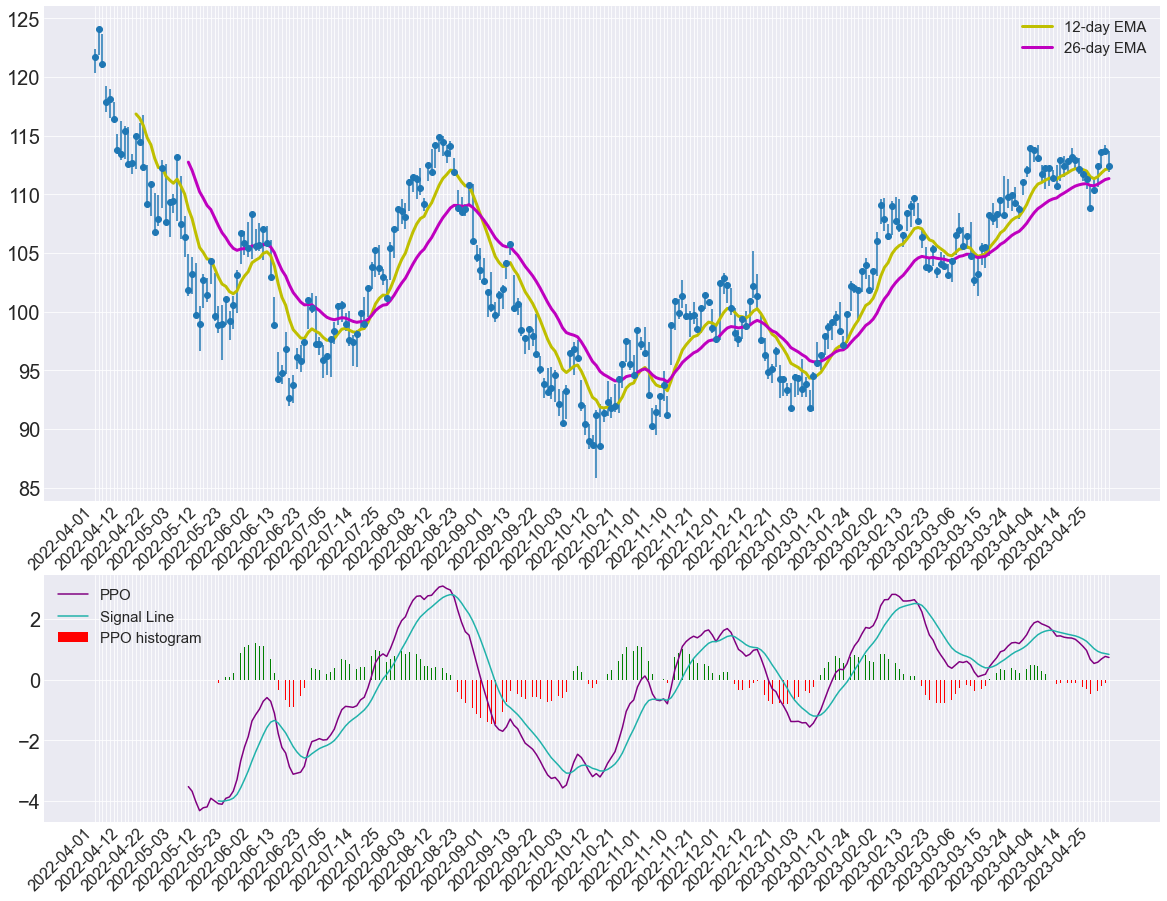

In [7]:
ppo.computeAndPlotPercentagePriceOscillator(companyName, # Ticker symbol
                                            start=start, # Start date to start computing
                                            every_nth=7) # interval (# days) between two successive tick labels on x-axis

# Moving Average Convergence Divergence
<br>
$\text{MACD}=\text{12-Period EMA} − \text{26-Period EMA}$<br><br>
$\text{Signal Line}=\text{9-period EMA of MACD}$<br><br>
A nine-day EMA of the MACD line is called the signal line, which is then plotted on top of the MACD line, which can function as a trigger for buy or sell signals. Traders may buy the security when the MACD line crosses above the signal line and sell—or short—the security when the MACD line crosses below the signal line. MACD indicators can be interpreted in several ways, but the more common methods are crossovers, divergences, and rapid rises/falls. <br><br>
MACD is similar to PPO but is absolute and not a percentage. As a result, it cannot be used to compare two different ticker symbols.

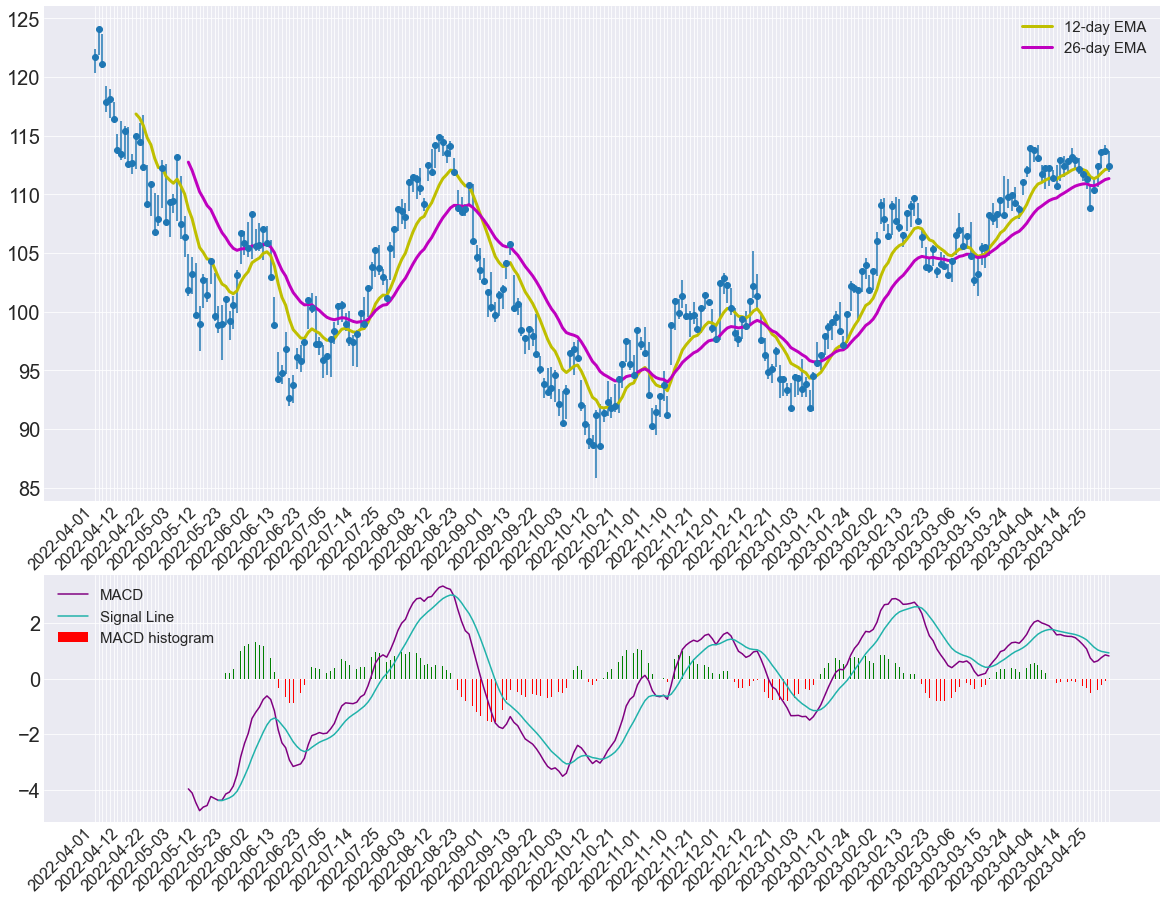

In [8]:
macd.getMACD(companyName, # Ticker symbol
             start=start, # Start date to start computing
             every_nth=7) # interval (# days) between two successive tick labels on x-axis

# Relative Strength Index
<br>
The relative strength index (RSI) is a momentum indicator used in technical analysis. RSI measures the speed and magnitude of a security's recent price changes to evaluate overvalued or undervalued conditions in the price of that security. The RSI is displayed as an oscillator (a line graph) on a scale of zero to 100.<br><br>
The RSI can do more than point to overbought and oversold securities. It can also indicate securities that may be primed for a trend reversal or corrective pullback in price. It can signal when to buy and sell. Traditionally, an RSI reading of 70 or above indicates an overbought situation. A reading of 30 or below indicates an oversold condition. As a momentum indicator, the relative strength index compares a security's strength on days when prices go up to its strength on days when prices go down. <br><br>
$\text{RSI}_{\text{step_one}} = 100 \times \left[ 1 - \frac{1}{1+\frac{\text{Average gain}}{\text{Average loss}}} \right] = 100 \times \left[ 1 - \frac{1}{\frac{\text{Average gain} + \text{Average loss}}{\text{Average loss}}} \right] = 100 \times \left[ 1 - \frac{\text{Average loss}}{\text{Average gain} + \text{Average loss}}\right] = 100 \times \left[\frac{\text{Average gain}}{\text{Average gain} + \text{Average loss}}\right]$<br><br>
Average gain and average loss are during a lookback period, e.g., $n=14$ days<br><br>
$\text{RSI}_{\text{step_two}} = 100 \times \left[ 1 - \frac{1}{1+\frac{\text{Previous Average gain} \times \left(n-1\right) + \text{Current gain}}{\text{Previous Average loss} \times \left(n-1\right) + \text{Current loss}}}\right]$<br><br>
Above 70% implies overbought. Below 30% implies oversold. <br><br>
The RSI will rise as the number and size of up days increase. It will fall as the number and size of down days increase. <br><br>
As you can see in the above chart, the RSI indicator can stay in the overbought region for extended periods while the stock is in an uptrend. The indicator may also remain in oversold territory for a long time when the stock is in a downtrend. <br><br>
 A bullish divergence occurs when the RSI displays an oversold reading followed by a higher low that appears with lower lows in the price. This may indicate rising bullish momentum, and a break above oversold territory could be used to trigger a new long position.

A bearish divergence occurs when the RSI creates an overbought reading followed by a lower high that appears with higher highs on the price. <br><br>

Falling price lows + Rising RSI lows = market is bullish<br><br>
https://www.investopedia.com/terms/r/rsi.asp

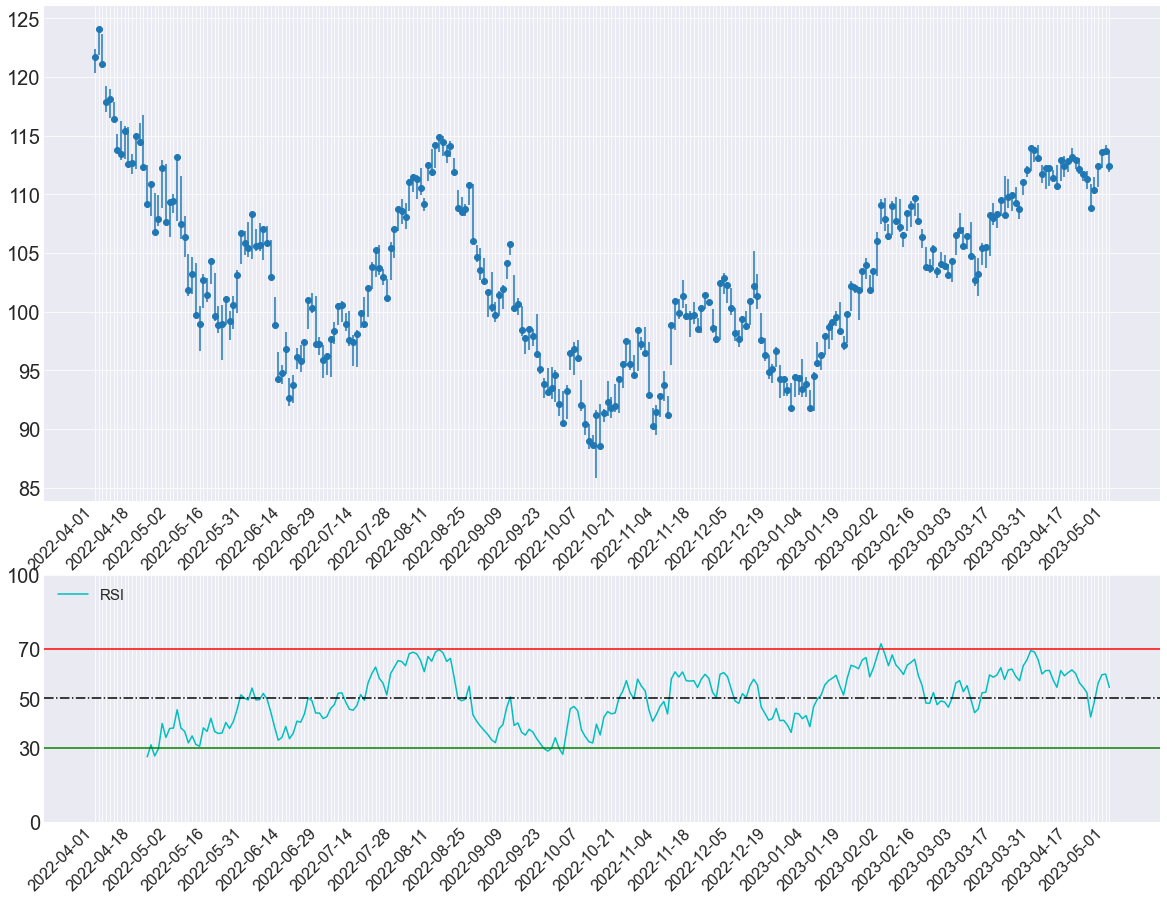

In [9]:
rsi.getRSI(companyName, # Ticker symbol
           n=14, # days for lookback, default is 14
           start=start, # Start date to start computing
           every_nth=10) # interval (# days) between two successive tick labels on x-axis